In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import sys
import math
from sklearn.svm import SVC
sys.path.append('/usr/local/libsvm/python')
from svmutil import *

In [2]:
df_train=pd.read_csv("http://www.amlbook.com/data/zip/features.train",delim_whitespace=True,header=None)
df_test=pd.read_csv("http://www.amlbook.com/data/zip/features.test",delim_whitespace=True,header=None)

In [3]:
colname=['digits','intensity','symmetry']
df_train.columns=colname
df_test.columns=colname
df_train.head()


,digits,intensity,symmetry
0,6.0,0.341092,-4.528937
1,5.0,0.444131,-5.496812
2,4.0,0.231002,-2.886750
3,7.0,0.200275,-3.534375
4,3.0,0.291936,-4.352062


In [4]:
#pre-process data of train
df_train.loc[df_train['digits']==8.0,"label"]=1
df_train.loc[df_train['digits']!=8.0,"label"]=-1
#df_train.loc[df_train['digits']==0,"label"]=1
#df_train.loc[df_train['digits']!=0,"label"]=-1

In [5]:
df_train.shape


(7291, 4)

In [6]:
#pre-process data of test
df_test.loc[df_test['digits']==8.0,"label"]=1
df_test.loc[df_test['digits']!=8.0,"label"]=-1
#df_test.loc[df_test['digits']==0,"label"]=1
#df_test.loc[df_test['digits']!=0,"label"]=-1

In [7]:
df_test.head(20)

,digits,intensity,symmetry,label
0,9.0,0.272178,-4.847937,-1.0
1,6.0,0.265133,-5.102000,-1.0
2,3.0,0.335926,-2.921562,-1.0
3,6.0,0.264850,-4.156625,-1.0
4,6.0,0.345338,-6.718438,-1.0
5,0.0,0.352385,-3.811500,-1.0
6,0.0,0.327906,-2.326875,-1.0
7,0.0,0.350395,-2.537000,-1.0
8,6.0,0.322758,-5.423125,-1.0
9,9.0,0.189361,-3.124062,-1.0


In [8]:
X_train = df_train.iloc[:, [1,2]].values
y_train = df_train.iloc[:,3].values

print(X_train.shape)
print(y_train.shape)

(7291, 2)
(7291,)


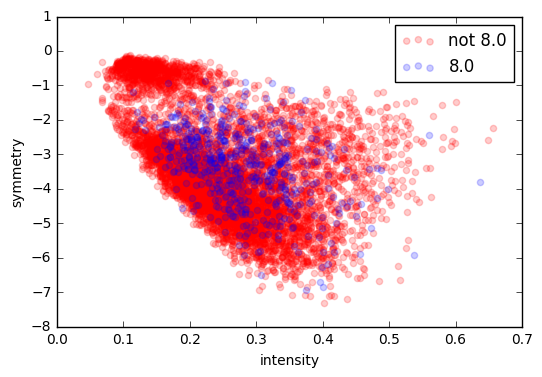

In [9]:
plt.scatter(x=X_train[y_train==-1,0],y=X_train[y_train==-1,1], color='Red',label='not 8.0',alpha=0.2)
plt.scatter(X_train[y_train==1,0],X_train[y_train==1,1], color='Blue',label='8.0',alpha=0.2)
plt.xlabel('intensity')
plt.ylabel('symmetry')
plt.legend(loc='upper right')
plt.show()

In [10]:
def plot_decision_regions(X,y, classifier,test_idx=None, resolution=0.02):
    markers=('s','x','o','^','v')
    colors=('red','blue','lightgreen','gray','cyan')
    cmap=ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:,0].min()-1, X[:,0].max()+1
    x2_min, x2_max = X[:,1].min()-1, X[:,1].max()+1
    
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))

    Z= classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z= Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)

    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())

    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl,1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx],label=cl)

    if test_idx:
        X_test, y_test= X[test_idx,:], y[test_idx]
        plt.scatter(X_test[:,0], X_test[:,1],c='',
                    alpha=1.0, linewidths=1, marker='o',
                    s=55, label='test set')

In [11]:
#constant of linear kernel
gamma=1
r=1
d=2
#grid parameters
C=[-5,-3,-1,1,3]
n_SV=[]
accuracy=[]
for ci in C:
    svc=SVC(kernel='poly',degree=d,gamma=gamma,coef0=r,C=math.pow(10,ci),verbose=True)
    svc.fit(X_train,y_train)
    n_SV.append(len(svc.support_))
    accuracy.append(svc.score(X_train,y_train))
    #print(svc.coef_)
    #print("|w| of c=%f is %f" %(ci, svc.coef_.dot(svc.coef_.T)))

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

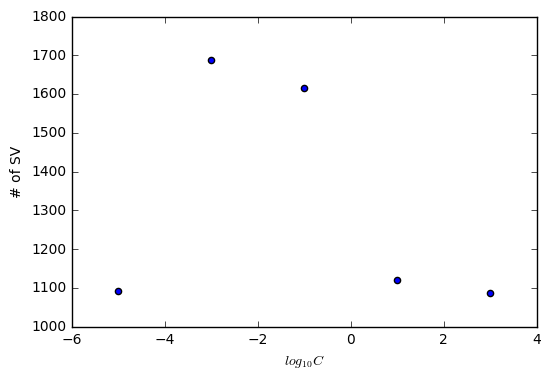

In [12]:
plt.scatter(C,n_SV,label="C verse n_SV")
plt.xlabel("$log_{10}C$")
plt.ylabel("# of SV")
plt.show()

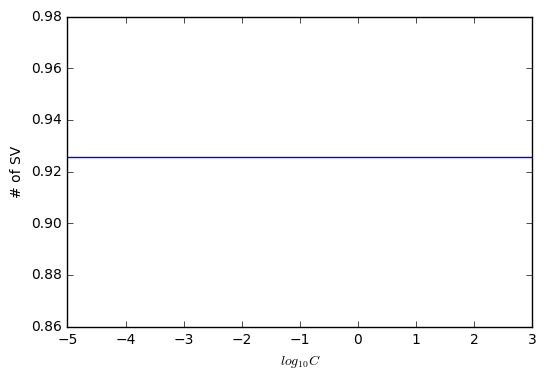

In [13]:
plt.plot(C,accuracy,label="C verse accuracy")
plt.xlabel("$log_{10}C$")
plt.ylabel("# of SV")
plt.show()

In [14]:
Ein=[(1-acc)*len(y_train) for acc in accuracy]
print("Ein:",Ein)

Ein: [542.00000000000011, 542.00000000000011, 542.00000000000011, 542.00000000000011, 542.00000000000011]


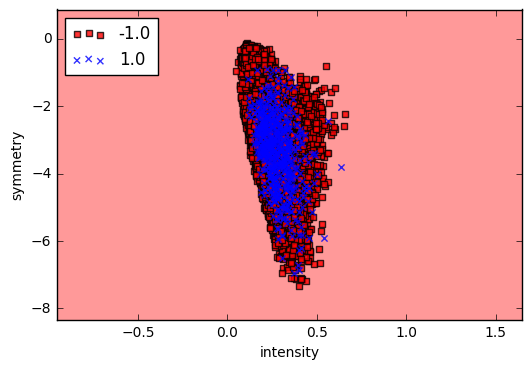

In [15]:
plot_decision_regions(X_train, y_train, classifier=svc)
plt.xlabel('intensity')
plt.ylabel('symmetry')
plt.legend(loc='upper left')
plt.show()